# Rabljeni motocikli

V nadaljevanju bom analizirala motocikle, ki se prodajajo na http://www.mobile.de. Izbrala sem le oglase rabljenih, nepoškodovanih motociklov, mlajših od 10 let, ter s prostornino večjo od 500ccm. Da bi se izognila ekstremnim in neresničnim vrednostim, sem omejila še število prevoženih km (1.000 < x < 150.000), prostornino (500 ccm < x < 2.000 ccm), moč (10 kW < x < 200 kW) in ceno (500 € < x < 30.000 €).

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
tabela = pd.read_csv('motocikli.csv', index_col = 'id', encoding = 'latin1')
pd.options.display.max_rows = 10

### Razlaga zajetih podatkov

- letnik: leto prve registracije motocikla, za katero bom privzela, da se ujema z letom izdelave
- znamka: ime izdelovalca motocikla
- tip: motocikli so na grobo razdeljeni v skupine glede na obliko in namen
- prostornina: delovna prostornina pogonskega agregata
- moc: moč pogonskega agregata izražena v kW
- km: število prevoženih kilometrov
- cena: cena motocikla, določena s strani prodajalca v evrih

In [3]:
motocikli = tabela.dropna(how='any')
motocikli

,letnik,znamka,tip,prostornina,moc,km,cena
id,,,,,,,
237662642,2006,Hyosung,Chopper And Cruiser,650,52,16000,2999
237662642,2006,Hyosung,Chopper And Cruiser,647,59,3945,2999
229082730,2006,Yamaha,Chopper And Cruiser,1100,48,54000,3800
231224244,2006,Harley-Davidson,Chopper And Cruiser,1800,85,4500,24500
222950115,2006,Yamaha,Chopper And Cruiser,1100,46,17999,7999
...,...,...,...,...,...,...,...
235939751,2016,Harley-Davidson,Tourer,1690,62,6200,27750
235820343,2016,Harley-Davidson,Tourer,1690,64,9500,27990
233522567,2016,Harley-Davidson,Tourer,1810,68,1090,28900


Poglejmo najprej nekaj povprečnih rezultatov vseh oglasov.

In [4]:
znamke = motocikli['znamka'].value_counts()
znamke

BMW                2849
Harley-Davidson    2093
Honda              1676
Kawasaki           1616
Yamaha             1434
                   ... 
Bimota                1
Norton                1
Thunderbike           1
Beta                  1
Can                   1
Name: znamka, dtype: int64

In [5]:
motocikli['letnik'].mean()

2011.3356736877299

In [6]:
motocikli['km'].mean()

16598.127983951854

In [7]:
motocikli['cena'].mean()

9586.1348712805084

In [24]:
motocikli['tip'].value_counts()

Naked Bike                      4067
Chopper And Cruiser             2853
Sports And Super Sports Bike    2607
Enduro And Touring Enduro       2486
Sport Touring Motorcycle        1515
Tourer                           984
Super Moto                       443
Name: tip, dtype: int64

In [9]:
motocikli['moc'].mean()

80.438381812102975

In [10]:
motocikli['prostornina'].mean()

1033.7905048478769

Ker nam povprečne vrednosti povedo le zanimive in ne koristnih podatkov, si podatke poglejmo bolj podrobno.

Recimo, da kupujemo motocikel in bi radi svoj denar čim bolje izkoristili. Poglejmo si kako cena narašča oziroma pada glede na izbrane parametre.

In [11]:
m = motocikli
m['prostornina'] = m['prostornina'].apply(lambda x: round((x /100), 0) * 100)
m['moc'] = m['moc'].apply(lambda x: round((x /10), 0) * 10)
m['km'] = m['km'].apply(lambda x: round((x /5000), 0) * 5000)

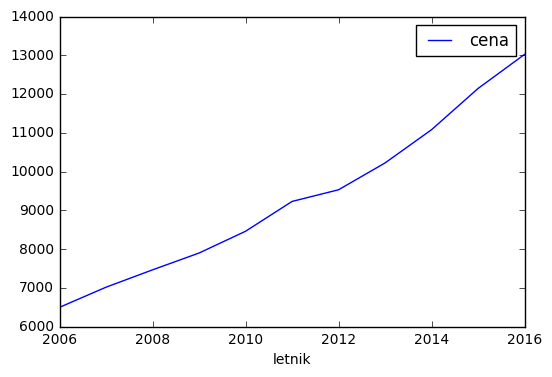

In [12]:
letnik = m.groupby('letnik').mean()
pd.DataFrame(letnik['cena']).plot(kind='line')

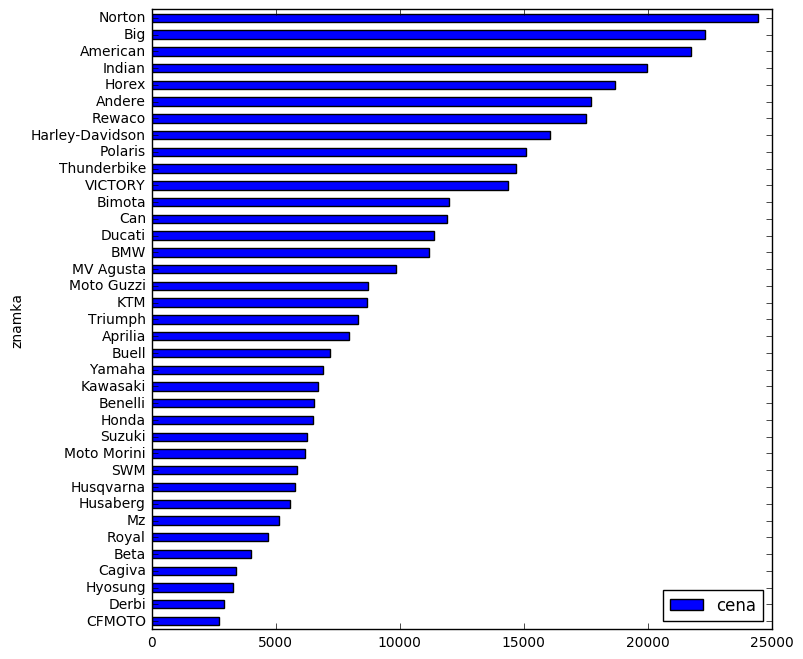

In [13]:
znamka = motocikli.groupby('znamka').mean()
pd.DataFrame(znamka['cena']).sort_values(['cena']).plot(kind='barh', figsize=(8,8), stacked=True)

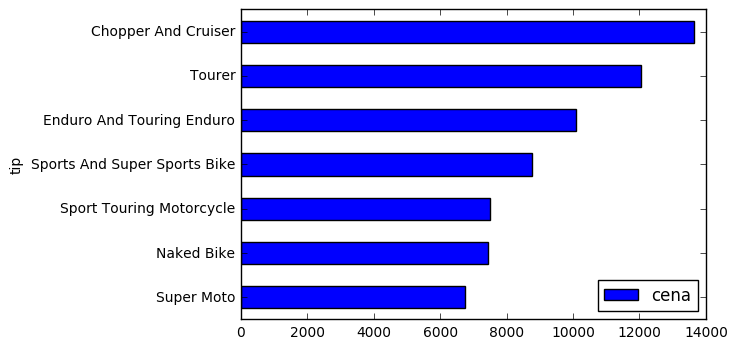

In [14]:
tip = motocikli.groupby('tip').mean()
pd.DataFrame(tip['cena']).sort_values(['cena']).plot(kind='barh')

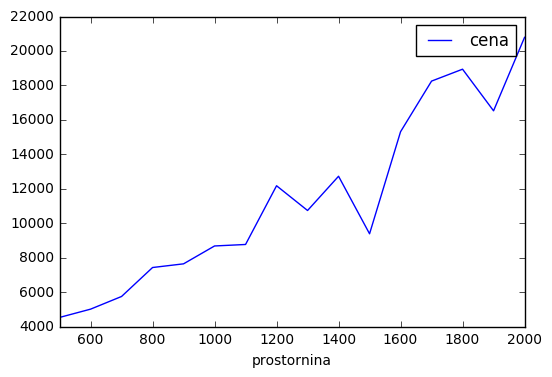

In [15]:
prostornina = m.groupby('prostornina').mean()
pd.DataFrame(prostornina['cena']).plot(kind='line')

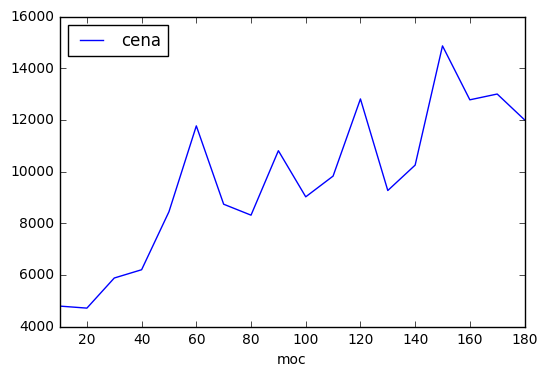

In [16]:
moc = m.groupby('moc').mean()
pd.DataFrame(moc['cena']).plot(kind='line')

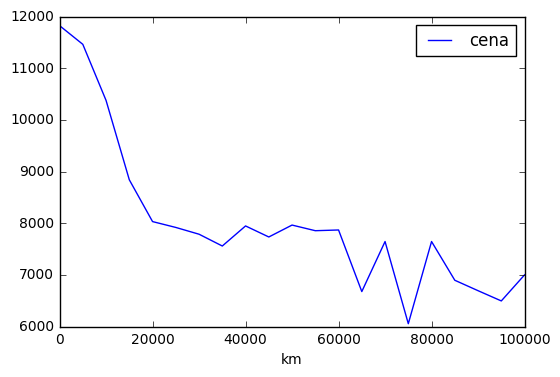

In [17]:
km = m.groupby('km').mean()
pd.DataFrame(km['cena']).plot(kind='line')

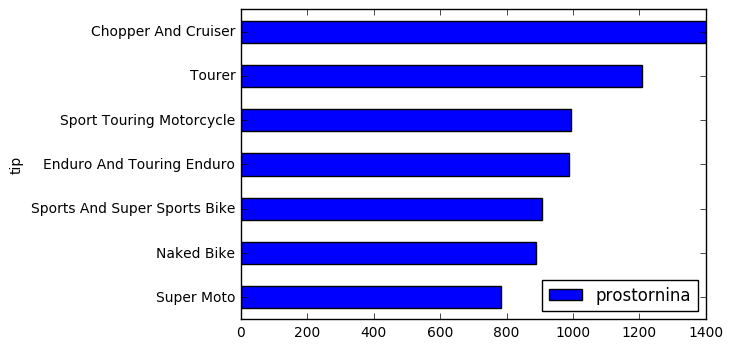

In [18]:
tip_prostornina = m.groupby('tip').mean()
pd.DataFrame(tip_prostornina['prostornina']).sort_values(['prostornina']).plot(kind='barh')

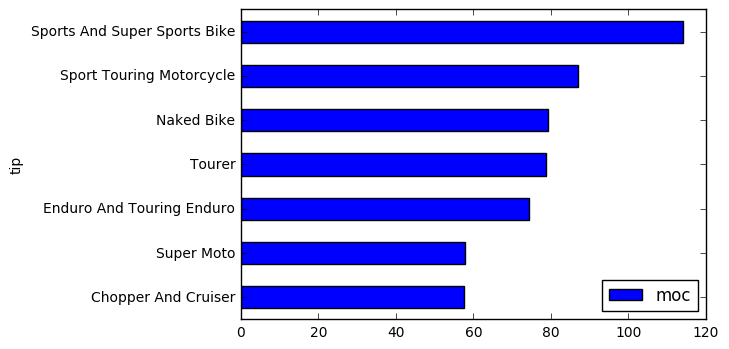

In [19]:
tip_moc = m.groupby('tip').mean()
pd.DataFrame(tip_moc['moc']).sort_values(['moc']).plot(kind='barh')

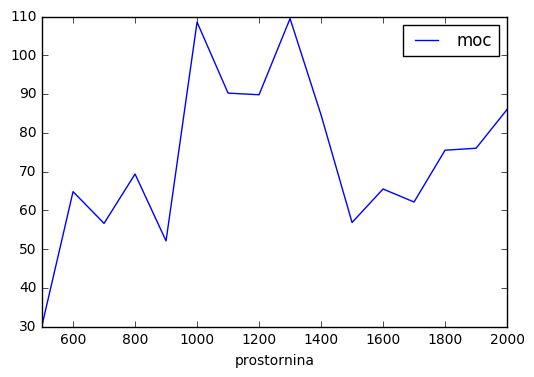

In [20]:
prostornina_moc = m.groupby('prostornina').mean()
pd.DataFrame(prostornina_moc['moc']).plot(kind='line')

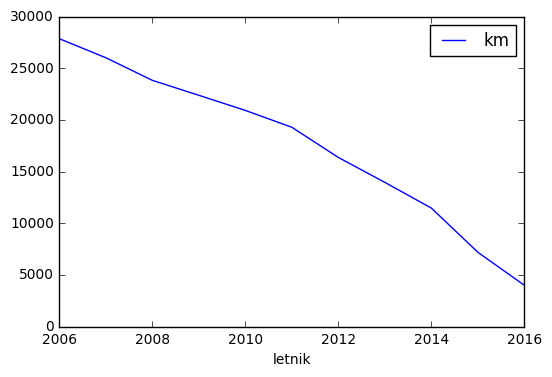

In [21]:
letnik_km = m.groupby('letnik').mean()
pd.DataFrame(letnik_km['km']).plot(kind='line')

V nadaljevanju bom analizirala le najbolj pogoste znamke motociklov, torej tiste, za katere obstaja vsaj 500 oglasov.

In [22]:
znamke_stevilo = znamke > 500
p = znamke_stevilo == True
pogoste_znamke = znamke_stevilo[p].index.values.tolist()

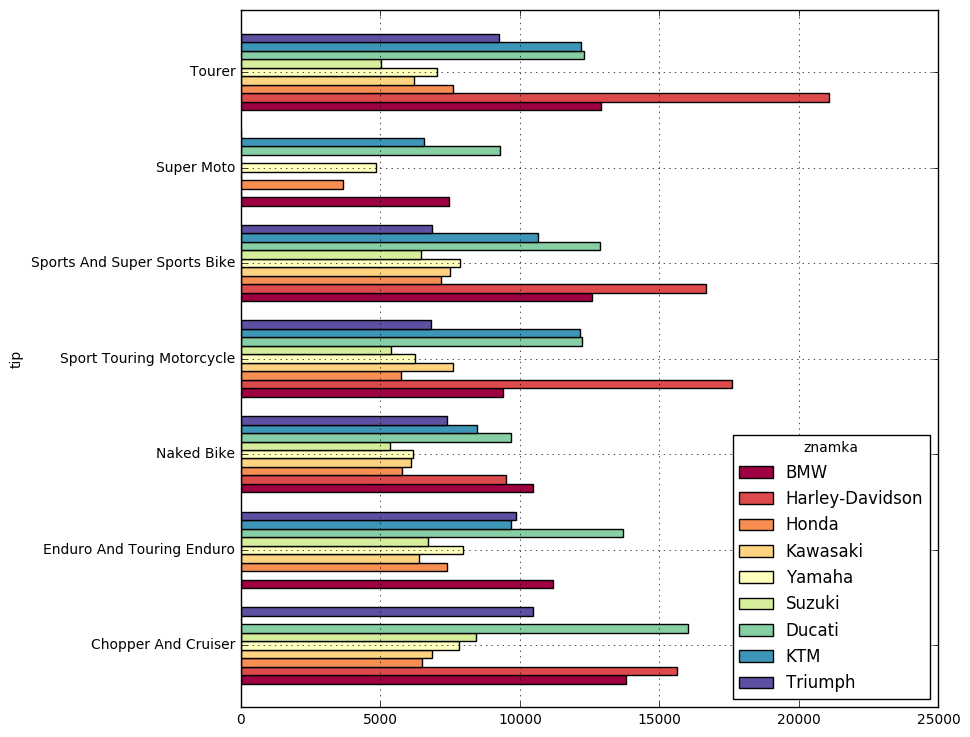

In [23]:
tip_znamka_cena = motocikli.pivot_table(index='tip', columns='znamka', values='cena')
tip_znamka_cena[pogoste_znamke].plot(kind='barh', figsize=(9,9), colormap='Spectral', grid=True, width=0.8)

Komentar: Harley Davidson izdeluje motocikle, ki jih uvrstimo v kategoriji "Chopper and Cruiser" in "Tourer". Prisotnost znamke v ostalih kategorijah je torej posledica napačne oznake tipa motocikla pri izdelavi oglasa.

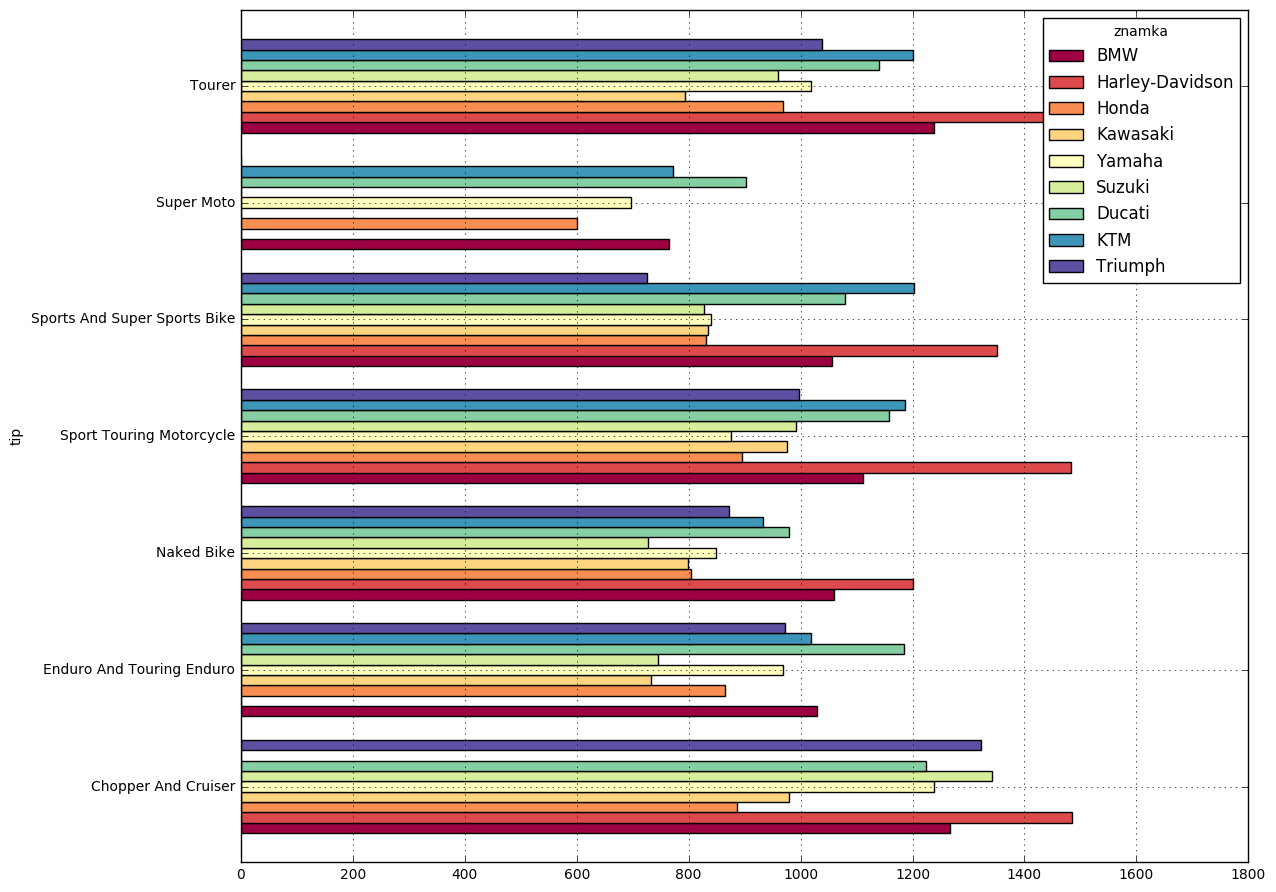

In [25]:
tip_znamka_prostornina = motocikli.pivot_table(index='tip', columns='znamka', values='prostornina')
tip_znamka_prostornina[pogoste_znamke].plot(kind='barh', figsize=(13,11), colormap='Spectral', grid=True, width=0.8)

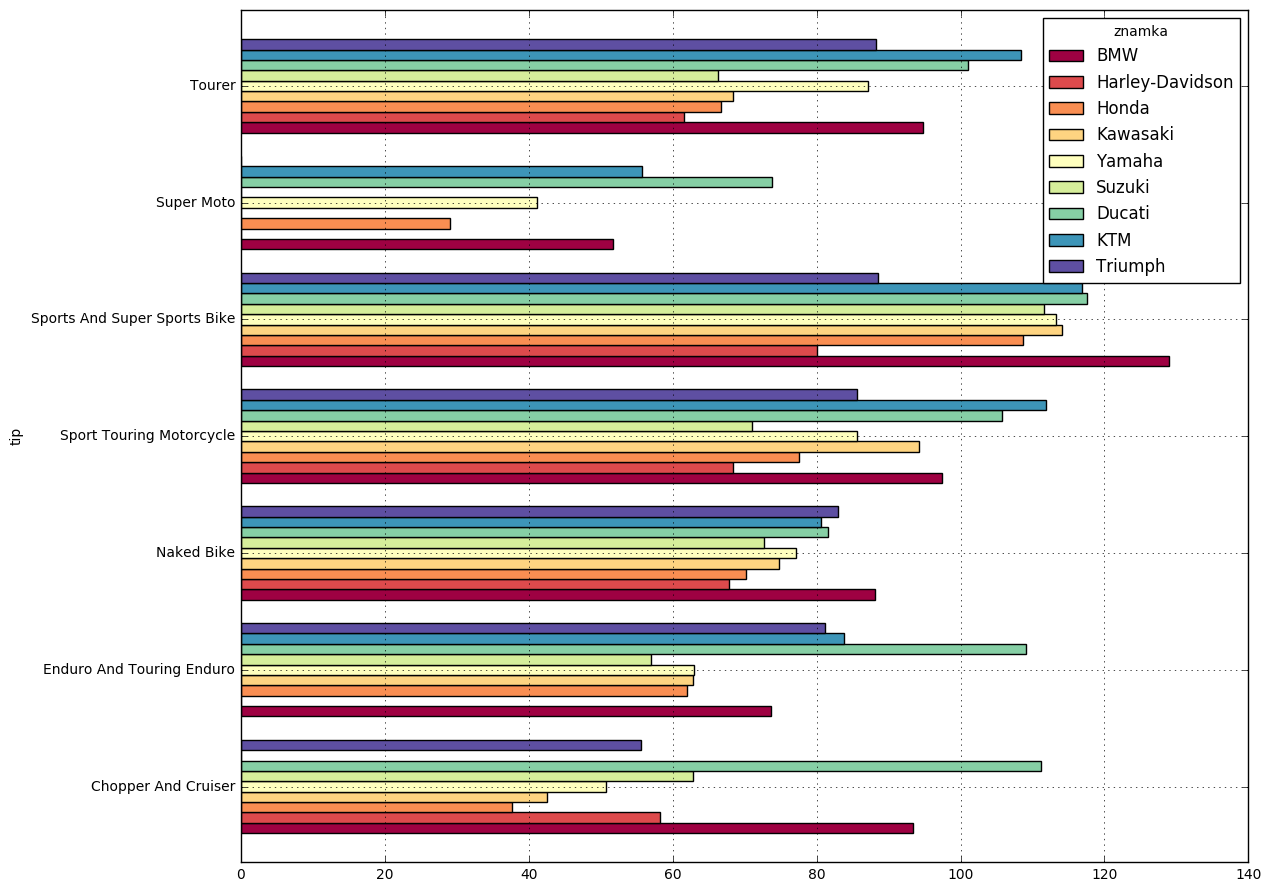

In [26]:
tip_znamka_moc = motocikli.pivot_table(index='tip', columns='znamka', values='moc')
tip_znamka_moc[pogoste_znamke].plot(kind='barh', figsize=(13,11), colormap='Spectral', grid=True, width=0.8)

Sledeč graf prikazuje razmerje med močjo in prostornino pogonskega agregata. Vidimo tudi, kako se razmerje razlikuje glede na tip motocikla. Majhna vrednost torej pomeni, da je prostornina precej večja od moči.

In [27]:
motocikli['razmerje'] = motocikli['moc'] / motocikli['prostornina']

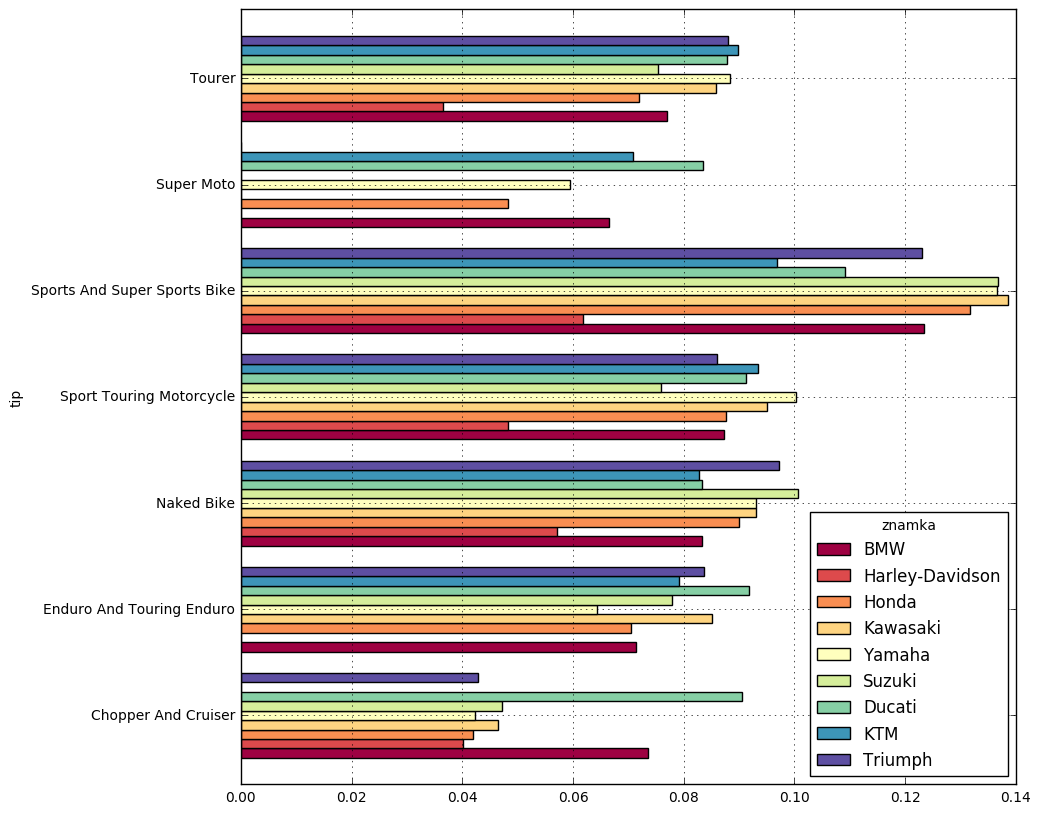

In [28]:
tip_znamka_moc = motocikli.pivot_table(index='tip', columns='znamka', values='razmerje')
tip_znamka_moc[pogoste_znamke].plot(kind='barh', figsize=(10,10), colormap='Spectral', grid=True, width=0.8)